In [71]:
import nest
import nest.voltage_trace
import matplotlib.pyplot as plt

In [72]:
nest.set_verbosity("M_WARNING")
nest.ResetKernel()

# Setup Parameters

We'll use a IaF neuron model with parameters taken from the NEST homepage.

In [73]:
T = 150               # ms
t_inj = [1]           # ms

ncells = 4

iaf_defaults = {
    "C_m": 15.0,
    "tau_m": 5.58,    # ms
    "t_ref": 2.0,     # ms
    "E_L": -65.0,     # mV
    "V_th": -40.0,    # mV
    "V_reset": -75.0  # mV
}

syn_params = {
    "weight": 300, 
    "delay": 10        # ms
}

# Configure the Network

We are aiming for a cyclical structure of $N$ cells and inject a single spike at $t=t_0$.
Then, we should observe the network to propagate said spike for a while.

In [74]:
nest.SetDefaults("iaf_psc_alpha", iaf_defaults)

neurons = nest.Create("iaf_psc_alpha", ncells)

network = [nest.Connect(neurons[i], neurons[(i+1)%ncells], syn_spec=syn_params) for i in range(ncells)]

voltmeter = nest.Create("voltmeter")
voltmeters = [nest.Connect(voltmeter, neurons[i]) for i in range(ncells)]

spike_gen = nest.Create("spike_generator", params={"spike_times": t_inj})

nest.Connect(spike_gen, neurons[0], syn_spec=syn_params)

# Run it!

In [75]:
nest.Simulate(T)

# Huge Success

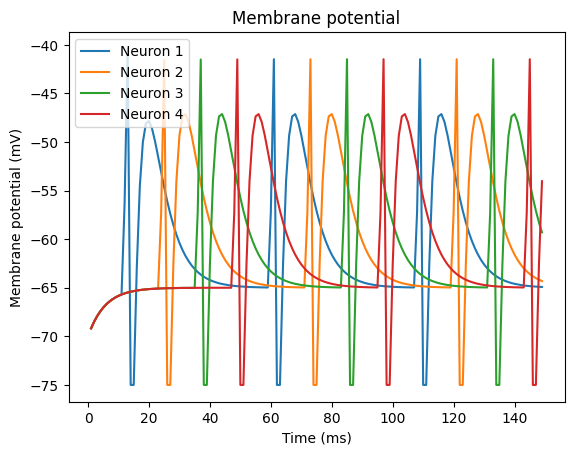

In [76]:
nest.voltage_trace.from_device(voltmeter)
plt.show()

# Task (5 min)

Please improve our NEST. Why the doubled spikes?